# Problem in hand :

###   Diabetic retinopathy prediction in patients 

#### Business Objective:
The variable to be predicted has two values (positive or negative on diabetic retinopathy). Thus, this is a binary classification project. The goal here is to predict whether a patient will suffer from diabetic retinopathy or not, conditioned on blood test features.


In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### importing the dataset here we have dropped the index column 

In [2]:
data = pd.read_csv("pronostico_dataset.csv",index_col=0)
data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


# Data Set Details:
### Target variables has two values in a classification project type: 0 (false) or 1 (true). 
### The number of instances (rows) in the data set is 6000, and the number of variables (columns) is 6.
### The following list summarizes the information of the variables
#### 1)ID: Numeric
#### 2)age: (numeric).
#### 3)systolic_bp: (normal range: below 120mmHg). When the heart beats, it squeezes and pushes blood through the arteries to the rest of the body. This force creates pressure on the blood vessels, and that is the systolic blood pressure.
#### 4)diastolic_bp: (normal range: lower than 80mmHg). It is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen.
#### 5)cholesterol: (normal range: between 125 and 200 mg/dl). It is a waxy, fat-like substance found in every cell in the body.
#### 6)prognosis: (0 or 1) (Target). It is 1 if the patient has retinopathy and 0 if he doesn't.


# Exploratory Data Analysis:
 here we will do the complete EDA and draw some insights

In [3]:
# at first we will create the copy of the dataset to keep orignal dataset beside from our analysis
d_data = data.copy()
d_data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [4]:
d_data.tail()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [5]:
print(f"data set colums are : {d_data.columns}")

data set colums are : Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')


In [6]:
data.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [7]:
d_data.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


### From above description of the datset we can draw some insights which are as follows:
age) in the age column the maximum age is 103 and the minimum age is 35

systolic_bp) in the systolic_bp column the maximum level counterd was 151 and the minimum level was 69

diastolic_bp) in the diastolic_bp column the maximum level counterd was 133 and the minimum level was 62

cholestrol) in the cholestrol column the maximum level counterd was 148 and the minimum level was 69

#### now we will type cast the columns if the types are misleading

In [8]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6000 non-null   float64
 1   systolic_bp   6000 non-null   float64
 2   diastolic_bp  6000 non-null   float64
 3   cholesterol   6000 non-null   float64
 4   prognosis     6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 281.2+ KB


here we can see 4 continous columns are of float datatype and the target variable is object hence there is no need to change the datatypes. for the target variable it will be converted when we will be doing encoding on the same

In [9]:
d_data.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

# missing values or null vlaues

first thing we should do :D

In [10]:
d_data.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

data set has no null values so no need of missing values imputation we will also visualize it using heatmap

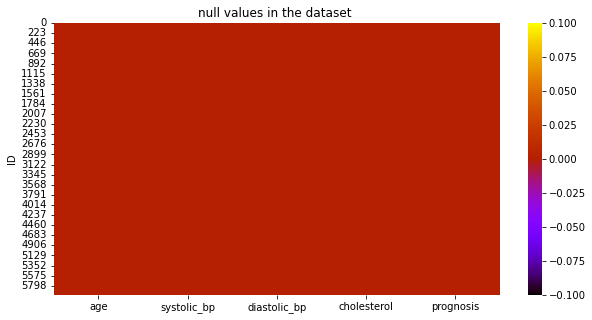

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(d_data.isnull(),cmap='gnuplot')
plt.title('null values in the dataset ')
plt.show()

from heatmap also we can see there are no null values are present in the dataset

### Duplicate Values:

In [12]:
d_data[d_data.duplicated()]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,


no duplicatae values also

### As we know we have only one catogorcal variableis in the dataset which is our target variable we will see the count of it

In [13]:
d_data.prognosis.value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

from above observation we can say our data is not imbalenced

## now we wil encode the catogorical variable which is prognosis using one hot encoding

In [14]:
d_data['prognosis'] = d_data['prognosis'].map({'retinopathy': 1,'no_retinopathy':0})

In [15]:
d_data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1


In [20]:
d_data[d_data['prognosis']==1]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5991,59.903956,105.516534,99.069641,108.177934,1
5992,72.708129,115.105489,99.500383,126.590583,1
5996,63.099686,100.039527,93.515186,104.971404,1


In [21]:
d_data[d_data['prognosis']==0]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
ID,,,,,
12,66.890987,93.205124,85.270310,106.465128,0
15,62.929328,101.524942,95.684936,102.916473,0
16,74.275743,91.245927,78.204968,99.417104,0
17,58.267020,101.259314,86.790774,102.242965,0
18,62.744349,89.883434,80.923457,102.083878,0
...,...,...,...,...,...
5989,66.273056,95.931085,97.187327,112.075571,0
5993,53.279942,88.726857,78.845703,86.271988,0
5994,56.603050,105.062208,91.448914,111.989797,0


In [22]:
d_data.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis         int64
dtype: object

## Outliers detection:

for this we have 3 techniques which are as follows
1) boxplot which is nothing but the so called IQR technique
2) dbscan clustering
3) isolation forest

note: this techniques are used only for detecting and to see the range of the outliers. 
we will use box plot and the isolation forest for this 

In [23]:
plt.style.use('ggplot')

#### Boxplot

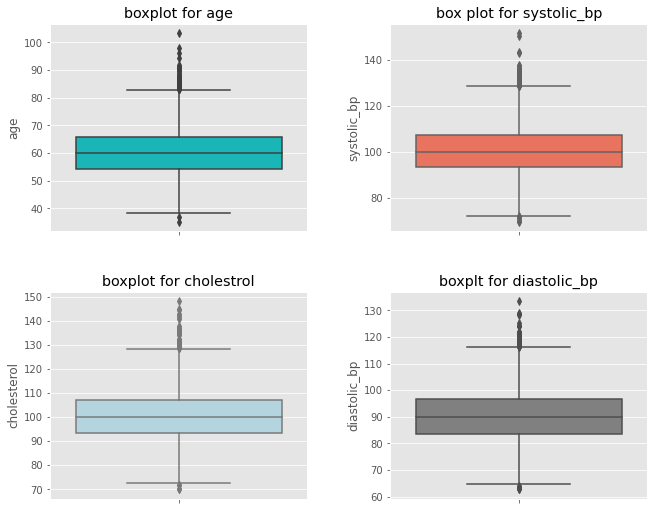

In [24]:
continous_list = ['age', 'systolic_bp', 'diastolic_bp','cholesterol']
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(y = d_data['age'],color='darkturquoise')
plt.title('boxplot for age')

plt.subplot(2,2,2)
sns.boxplot(y = d_data['systolic_bp'],color='tomato')
plt.title('box plot for systolic_bp')

plt.subplot(2,2,3)
sns.boxplot(y = d_data['cholesterol'],color = 'lightblue')
plt.title('boxplot for cholestrol')

plt.subplot(2,2,4)
sns.boxplot(y = d_data['diastolic_bp'],color = 'grey')
plt.title('boxplt for diastolic_bp')

plt.tight_layout(pad = 4)
plt.show()

from the above boxplots we can see outliers are in all the continous columns we will treat them when we will be doing outlier treatment as per reqirement

from the boxplots we can say
1) in age column peoples more than age 80 are considered as outliers

2) in systolic_bp peoples with more than 130 systolic_bp are considered as outliers

3) in diastolis_bp peoples with more than 118 are considered as outliers

4) in cholestrol peoples with more than 129 level are considered as outliers 

#### Isolation Forest:

Bydefault isolation forest wil give -1 to the outliers and 1 to the normal datapoint

In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
# instatiating an object
i_model = IsolationForest(random_state=10,contamination=.01)
i_model.fit(d_data) # fitting on the data 

IsolationForest(contamination=0.01, random_state=10)

In [27]:
y_pred_outliers = i_model.predict(d_data) # predicting for the data

In [28]:
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
d_data['cluster_id'] =  y_pred_outliers # adding the column to the orignal data which will show the anamoly and the normal data
d_data.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,cluster_id
ID,,,,,,
0,77.196340,85.288742,80.021878,79.957109,1,1
1,63.529850,99.379736,84.852361,110.382411,1,1
2,69.003986,111.349455,109.850616,100.828246,1,1
3,82.638210,95.056128,79.666851,87.066303,1,1
4,78.346286,109.154591,90.713220,92.511770,1,1


In [30]:
d_data[d_data['cluster_id']==-1].count()

age             60
systolic_bp     60
diastolic_bp    60
cholesterol     60
prognosis       60
cluster_id      60
dtype: int64

from above observation we can say there are aprox 60 outliers are present in the data  

#### Now will see the distribution of the data and we will see the skewnesss of the data

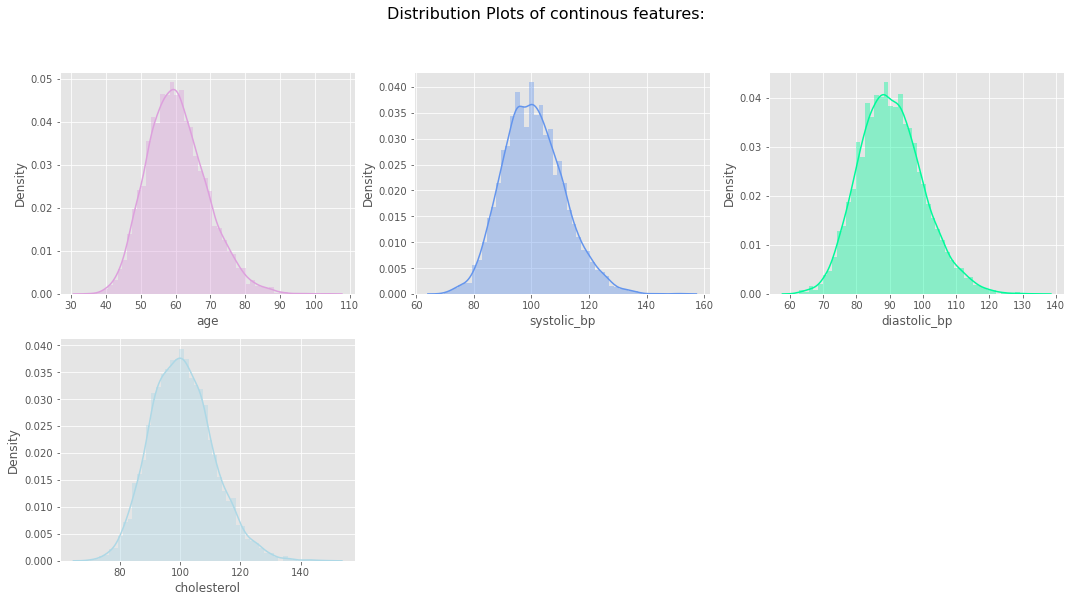

In [31]:

color_list = ['plum', 'cornflowerblue', 'mediumspringgreen','lightblue']
plt.figure(figsize = (18, 9))
plt.suptitle("Distribution Plots of continous features:", fontsize=16)
for i in range(0, len(continous_list)):
    plt.subplot(2, 3, i+1)
    sns.distplot(d_data[continous_list[i]], color = color_list[i])

from above observations we can see the data is noramlly distributed hence no need to handel skewness also


 Now we will check the skewness of the data it is not really needed because in above distribution plots we have seen our features are normaly distrubuted but as a part of EDA we will check once

In [32]:
d_data.skew()

age             0.441141
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
prognosis      -0.058039
cluster_id     -9.851834
dtype: float64

from this observation we can see the data is not that skewed hence no need to do transformation on the data to remove skewness also

### We can also plot Histogram for the same  

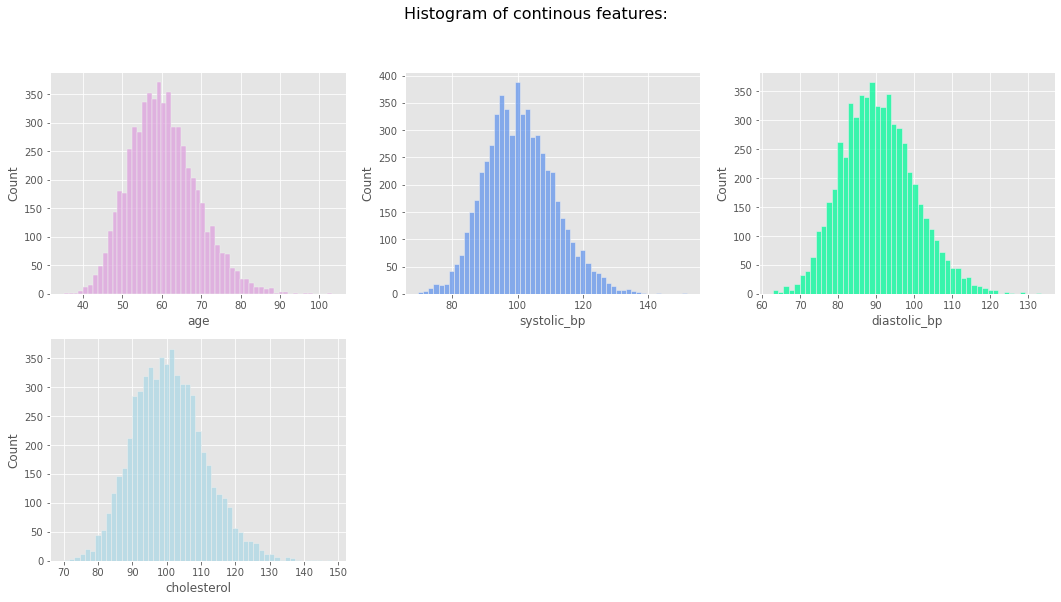

In [33]:
color_list = ['plum', 'cornflowerblue', 'mediumspringgreen','lightblue']
plt.figure(figsize = (18, 9))
plt.suptitle("Histogram of continous features:", fontsize=16)
for i in range(0, len(continous_list)):
    plt.subplot(2, 3, i+1)
    sns.histplot(d_data[continous_list[i]], color = color_list[i])

so the only thing we get is most of the peoples come under the age criteria of 50 to 70 according to our survey

there are some peoples with high systolic_bp they need instant medical treatment :XD



In [38]:
d_data[d_data['prognosis']==1]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,cluster_id
ID,,,,,,
0,77.196340,85.288742,80.021878,79.957109,1,1
1,63.529850,99.379736,84.852361,110.382411,1,1
2,69.003986,111.349455,109.850616,100.828246,1,1
3,82.638210,95.056128,79.666851,87.066303,1,1
4,78.346286,109.154591,90.713220,92.511770,1,1
...,...,...,...,...,...,...
5991,59.903956,105.516534,99.069641,108.177934,1,1
5992,72.708129,115.105489,99.500383,126.590583,1,1
5996,63.099686,100.039527,93.515186,104.971404,1,1


In [31]:
d_data[(d_data['age']>50)&(d_data['prognosis']==1)]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,cluster_id
ID,,,,,,
0,77.196340,85.288742,80.021878,79.957109,1,1
1,63.529850,99.379736,84.852361,110.382411,1,1
2,69.003986,111.349455,109.850616,100.828246,1,1
3,82.638210,95.056128,79.666851,87.066303,1,1
4,78.346286,109.154591,90.713220,92.511770,1,1
...,...,...,...,...,...,...
5991,59.903956,105.516534,99.069641,108.177934,1,1
5992,72.708129,115.105489,99.500383,126.590583,1,1
5996,63.099686,100.039527,93.515186,104.971404,1,1


According to our research retinopathy is mostly occured in peoples with age > 50 and our data also states the same 

peoples with the age > 50 has retinopathy as compared to peoples with age < 50

# Relation Between The Features

<AxesSubplot:xlabel='age', ylabel='systolic_bp'>

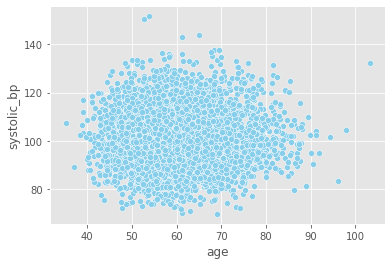

In [32]:
sns.scatterplot(d_data.age,d_data.systolic_bp,data=d_data,color='skyblue')

here we can't see the relation ship nor negative nor positive 

<AxesSubplot:xlabel='age', ylabel='diastolic_bp'>

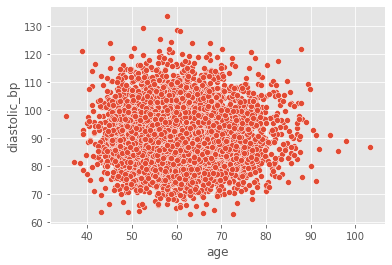

In [33]:
sns.scatterplot(d_data.age,d_data.diastolic_bp,data=d_data)

same no relation ship. we will see the numbers also when we will plot the the correlation

<AxesSubplot:>

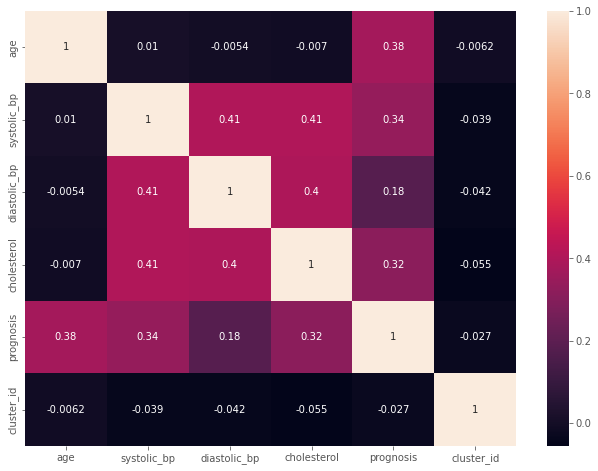

In [34]:
plt.figure(figsize=(11,8))
sns.heatmap(d_data.corr(),annot = True)

<Figure size 1296x720 with 0 Axes>

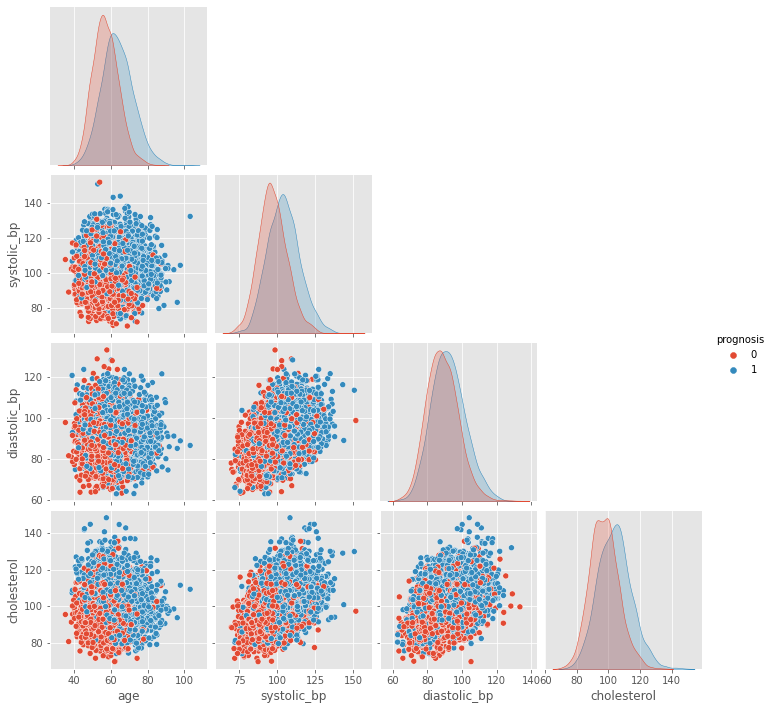

In [44]:
plt.figure(figsize=(18,10))
sns.pairplot(d_data.iloc[:,0:5],hue='prognosis',corner=1)

## Speed Up The EDA

In [35]:
import pandas_profiling as pp
import sweetviz as sv

In [36]:
EDA_report= pp.ProfileReport(d_data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
sweet_report = sv.analyze(data)
sweet_report.show_html('diabetic_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report diabetic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Outlier Treatment:
     we have seen the range of the data is totaly acceptable and making sense so the treatment is not neesarry here

# Feature Enginering :
    although there are to less features in the dataset we need to consider them all but for the sake of the discussion we
    will see the feature importance
    
    for this we have three methods which are as follows:
    
   1) univariate analysis
   2) RFE(Recursive Feature Elimination)
   3) Tree Based
   
   but the data we have is kind of no-linear so we will use tree based method

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
array = d_data.values
print(array)

[[0.61707027 0.19035002 0.24366523 0.12763709 1.         1.        ]
 [0.41643102 0.36214063 0.31203795 0.51637889 1.         1.        ]
 [0.49679742 0.5080697  0.66587392 0.39430604 1.         1.        ]
 ...
 [0.29945769 0.35045763 0.56463097 0.65045407 1.         1.        ]
 [0.41553703 0.45271817 0.35744918 0.46105228 1.         1.        ]
 [0.40141187 0.33191844 0.34071019 0.49393016 0.         1.        ]]


In [67]:
x=array[:,0:4]
y=array[:,4]

In [68]:
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.3146983  0.2616823  0.15552424 0.26809517]


In [50]:
d_data.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis',
       'cluster_id'],
      dtype='object')

from above we can say the age feature feature is more important for predicting Y and the distolic_bp is less as compared to others

# Data Imbalance:
as we seen above data is not imbalanced but we will also visualize it

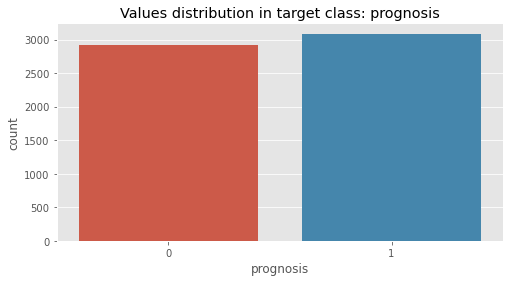

In [57]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: prognosis")
sns.countplot(data = d_data, x = 'prognosis')
plt.show()

# Feature Scaling :

Some of the algotithm we are gonna use are based on the distances eventualy our data is not that sparse but if we scale the data it will not effect our accuracy

for the same we have to methods :

1) normalization
2) standadization

we will do normalization in this contex because the age and the level of bp cannot be in negative range 

In [55]:
from sklearn.preprocessing import MinMaxScaler 

scale = MinMaxScaler()
d_data.loc[:,'age':'cholesterol'] = scale.fit_transform(d_data.loc[:,'age':'cholesterol'])
d_data

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,cluster_id
ID,,,,,,
0,0.617070,0.190350,0.243665,0.127637,1,1
1,0.416431,0.362141,0.312038,0.516379,1,1
2,0.496797,0.508070,0.665874,0.394306,1,1
3,0.696963,0.309429,0.238640,0.218471,1,1
4,0.633953,0.481311,0.394995,0.288047,1,1
...,...,...,...,...,...,...
5995,0.212099,0.307009,0.336997,0.481390,0,1
5996,0.410116,0.370184,0.434655,0.447243,1,1
5997,0.299458,0.350458,0.564631,0.650454,1,1


# Model Building :

###  we will create multiple models one by one then we will cross_validate one by one to avoid Overfiting and Underfiting.then will pick 2 algorithms with the best accuracy and improve accuracy of the particular algorithm using hyperparameter tuning

first we will split our data into Target and input variables

In [70]:
d_data

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,cluster_id
ID,,,,,,
0,0.617070,0.190350,0.243665,0.127637,1,1
1,0.416431,0.362141,0.312038,0.516379,1,1
2,0.496797,0.508070,0.665874,0.394306,1,1
3,0.696963,0.309429,0.238640,0.218471,1,1
4,0.633953,0.481311,0.394995,0.288047,1,1
...,...,...,...,...,...,...
5995,0.212099,0.307009,0.336997,0.481390,0,1
5996,0.410116,0.370184,0.434655,0.447243,1,1
5997,0.299458,0.350458,0.564631,0.650454,1,1


In [75]:
X=d_data.iloc[:,0:4]
Y=d_data.iloc[:,4]
print(X.shape,Y.shape)

(6000, 4) (6000,)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 48, 76.44444444444444


Best possible Random State is 48 we will use it to split the data

In [96]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=48)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(4200, 4) (4200,) (1800, 4) (1800,)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

first we will create the models with default parameters and also cross_validate the score using crossvalidation

### Logistic Regression:


In [93]:
lg = LogisticRegression()

lg.fit(x_train, y_train)

pred_lg = lg.predict(x_test)

print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

lg_scores = cross_val_score(lg, X, Y, cv = 10)# cross validating the model
print(lg_scores)
# accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")


Accuracy Score of Logistic Regression model is 76.44444444444444
[0.72       0.75333333 0.78       0.74333333 0.715      0.75
 0.75333333 0.73833333 0.755      0.74      ]
Mean of accuracy scores is for Logistic Regression is 74.48333333333333



### DecisionTreeClassifier

In [94]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

dtc_scores = cross_val_score(dtc, X, Y, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

Accuracy Score of Decision Tree Classifier model is 66.55555555555556
[0.63166667 0.66       0.66833333 0.66       0.645      0.65333333
 0.65333333 0.665      0.68333333 0.66833333]
Mean of accuracy scores is for Decision Tree Classifier is 65.88333333333333



### KNN Algorithm

In [95]:
knc = KNeighborsClassifier(n_neighbors = 5)

knc.fit(x_train, y_train)

pred_knc = knc.predict(x_test)

print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

knc_scores = cross_val_score(knc, X, Y, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

Accuracy Score of K-Nearest Neighbour Classifier model is 72.0
[0.69       0.71666667 0.74       0.70833333 0.705      0.74166667
 0.70833333 0.715      0.71166667 0.715     ]
Mean of accuracy scores is for KNN Classifier is 71.51666666666667



### SVC

In [98]:
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

svc_scores = cross_val_score(svc, X, Y, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores for SVC Classifier is {svc_scores.mean()*100}\n")

Accuracy Score of Support Vector Classifier model is 76.61111111111111
[0.71333333 0.75833333 0.76666667 0.76       0.72       0.765
 0.75666667 0.745      0.755      0.75      ]
Mean of accuracy scores is for SVC Classifier is 74.89999999999999



### Random Forest

In [100]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

pred_rfc = rfc.predict(x_test)

print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

rfc_scores = cross_val_score(rfc, X, Y, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores for Random Forest Classifier is {rfc_scores.mean()*100}\n")

Accuracy Score of Random Forest model is 73.11111111111111
[0.70333333 0.72333333 0.73333333 0.73166667 0.74333333 0.74833333
 0.73333333 0.72       0.74333333 0.75166667]
Mean of accuracy scores for Random Forest Classifier is 73.31666666666666



### MultinominalNB

In [101]:
nb = MultinomialNB()

nb.fit(x_train, y_train)

pred_nb = nb.predict(x_test)

print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

nb_scores = cross_val_score(nb, X, Y, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores for MultinomialNB is {nb_scores.mean()*100}\n")

Accuracy Score of MultinomialNB model is 48.72222222222222
[0.515      0.515      0.515      0.515      0.515      0.515
 0.515      0.51333333 0.51333333 0.51333333]
Mean of accuracy scores is for MultinomialNB is 51.45000000000002



### GaussianNB

In [102]:
gb = GaussianNB()

gb.fit(x_train,y_train)

pred_gb = gb.predict(x_test)

print("Accuracy of GaussianNB model is",accuracy_score(y_test,pred_gb)*100)

gb_scores = cross_val_score(gb,X,Y,cv = 10)
print(nb_scores)
print(f"Mean of accureacy score for GaussianNB is {gb_scores.mean()*100}\n")

Accuracy of GaussianNB model is 75.77777777777777
[0.515      0.515      0.515      0.515      0.515      0.515
 0.515      0.51333333 0.51333333 0.51333333]
Mean of accureacy score for GaussianNB is 73.5



### Adaboost Classifire

In [103]:
ada= AdaBoostClassifier()

ada.fit(x_train, y_train)

pred_ada = ada.predict(x_test)

print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

ada_scores = cross_val_score(ada,X,Y,cv=10)
print(ada_scores)
print(f"Mean of accureacy score for GaussianNB is {ada_scores.mean()*100}\n")

Accuracy Score of ADA Boost model is 74.83333333333333
[0.71666667 0.75166667 0.74666667 0.74666667 0.70833333 0.75333333
 0.73333333 0.72833333 0.75666667 0.735     ]
Mean of accureacy score for GaussianNB is 73.76666666666667



### Xgboost 

In [106]:
xb = XGBClassifier()

xb.fit(x_train,y_train)

pred_xb = xb.predict(x_test)

print("Accuracy Score of Xgboost model is", accuracy_score(y_test, pred_xb)*100)

xb_score = cross_val_score(xb,X,Y,cv=10)
print(xb_score)
print(f"Mean of accuracy score for Xgboost is {xb_score.mean()*100}\n")

Accuracy Score of Xgboost model is 73.0
[0.69166667 0.74       0.72166667 0.71333333 0.70833333 0.73666667
 0.72666667 0.70833333 0.75       0.72666667]
Mean of accuracy score for Xgboost is 72.23333333333332

